## Case: Digit Recognition
One of the most exciting, but challenging, applications of machine learning is image recognition aka image classification, a subdomain of computer vision. A famous teaching example is finding a classifier that is able to determine if an image shows either a cat or a dog. Such a classifier is trained by processing thousands of labeled images of cats and dogs.  
  
However, the  hello world application for image classification is handwritten digit recognition. 
  
![](images/mnist.png)
  
Starting from a set of labeled handwritten digits we want to create a classifier that can correctly recognize new handwritten digits. For experiments and teaching in this area often the _MNIST_ dataset is used. The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is widely used for training and testing in the field of machine learning (Wikipedia MNIST database, 2019). Since it is often used in machine learning experiments it is offered by the Python library KERAS  in a form that is suitable for machine learning.  

In [2]:
import numpy as np
import pandas as pd

# keras import for the dataset
from keras.datasets import mnist

Using TensorFlow backend.


AttributeError: module 'tensorflow' has no attribute 'compat'

We learn from the Keras documentation that mnist.load_data() returns
2 tuples:
- X_train, X_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
- y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).  
  
The load_data function splits the database in a training set of 60.000 digits and a testset of 10.000 digits. Each digit is represented by a grayscale image of 28 by 28 pixels (784 pixels in total) with a value between 0 (to be interpreted as white) and 255 (to be interpreted as black). Remark: the datatype of X_train and X_test is a numpy array and not a pandas dataframe!


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# each training and test element is a 28 x 28 pixel grayvalue image 
print(X_train[0].shape)
np.set_printoptions(linewidth=np.inf) # avoid line wrapping when printing array
print(X_train[0])


(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 2

In [4]:
# the corresponding label is the "real" digit
print(y_train[0])

print(np.unique(y_train, return_counts=True)) # show all unique labels

5
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949], dtype=int64))


To further explore the dataset we can visualize the first nine digits using the `imshow` method from `matplotlib`.  
  
Remark: `imshow()` expects a `numpy` array as its first parameter.

<Figure size 432x288 with 0 Axes>

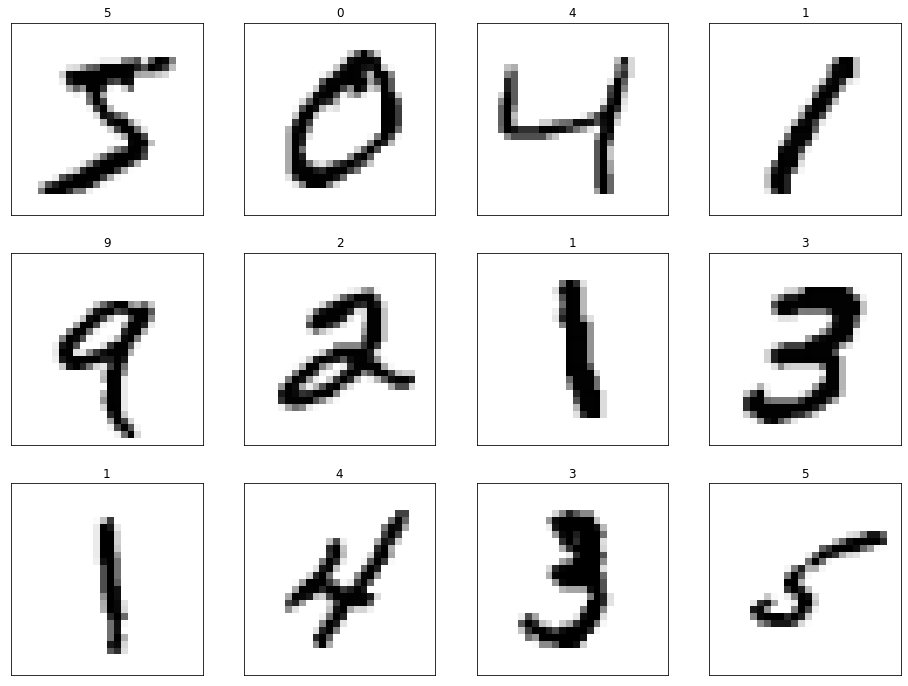

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()
nrows,ncols = 3,4
plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12))

for i in range(12):  # show first 12 digits
  plt.subplot(nrows,ncols,i+1)  # i+1 is position of subplot in 3 x 4 table
  # show bitmap, interpret 0 as white and 255 as black (grayvalues)
  plt.imshow(X_train[i], cmap=plt.cm.gray_r)
  plt.title(y_train[i])   # real value as title
  plt.xticks([])   # no ticks on x axis
  plt.yticks([])   # not ticks on y axis

Looking at the digits, you can see why handwritten digit recognition is such a challenge. Some people write “open” 4s, while some write “closed” 4s, etc.  